<a href="https://colab.research.google.com/github/KenaMuigai/assessment/blob/main/pula_analytics_assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Assessment

###Data Preparation

In [1]:
!pip install numpy-financial

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from scipy import stats

import numpy_financial as npf

In [3]:
url = 'https://raw.githubusercontent.com/KenaMuigai/assessment/main/Analyst_Data.csv'
df = pd.read_csv(url)

In [4]:
df.head

<bound method NDFrame.head of       Hour      Date/hour start  Solar electricity generation (kWh)  \
0        0  2020-01-01 00:00:00                               0.000   
1        1  2020-01-01 01:00:00                               0.000   
2        2  2020-01-01 02:00:00                               0.000   
3        3  2020-01-01 03:00:00                               0.000   
4        4  2020-01-01 04:00:00                               0.000   
...    ...                  ...                                 ...   
8755    19  2020-12-31 19:00:00                               0.012   
8756    20  2020-12-31 20:00:00                               0.003   
8757    21  2020-12-31 21:00:00                               0.000   
8758    22  2020-12-31 22:00:00                               0.015   
8759    23  2020-12-31 23:00:00                               0.000   

      Electricity usage (kWh)  
0                    1.509849  
1                    1.411859  
2                    

In [5]:
print(df.describe())

              Hour  Solar electricity generation (kWh)  \
count  8760.000000                         8760.000000   
mean     11.500000                            1.116750   
std       6.922582                            2.026098   
min       0.000000                            0.000000   
25%       5.750000                            0.000000   
50%      11.500000                            0.024000   
75%      17.250000                            1.272750   
max      23.000000                           13.050000   

       Electricity usage (kWh)  
count              8760.000000  
mean                  7.312704  
std                 491.479806  
min                 -12.624000  
25%                   0.300000  
50%                   0.621000  
75%                   1.686000  
max               46000.000000  


In [6]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

Hour                                  0
Date/hour start                       0
Solar electricity generation (kWh)    0
Electricity usage (kWh)               0
dtype: int64


###Data Checks and Visualization

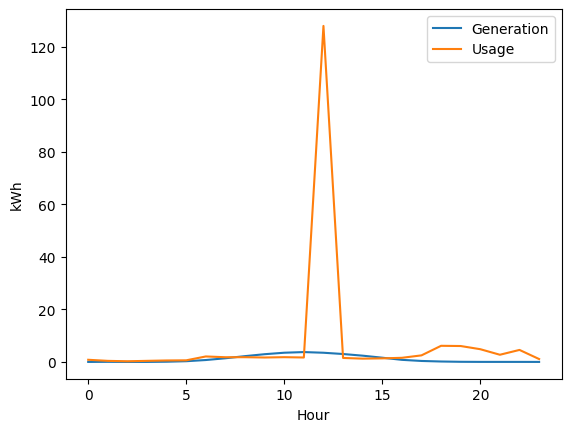

In [7]:
avg_generation = df.groupby(df['Hour'])['Solar electricity generation (kWh)'].mean()
avg_usage = df.groupby(df['Hour'])['Electricity usage (kWh)'].mean()

plt.plot(avg_generation, label='Generation')
plt.plot(avg_usage, label='Usage')
plt.xlabel('Hour')
plt.ylabel('kWh')
plt.legend()
plt.show()

####Outliers

Because I have outlier(s), I am going to investigate those

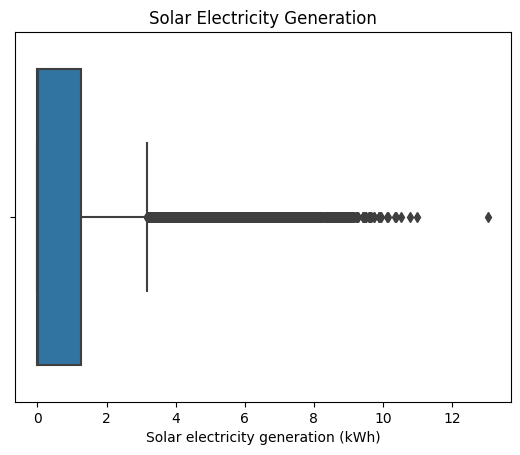

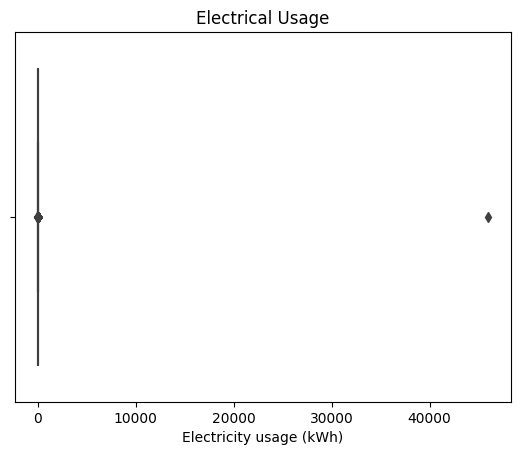

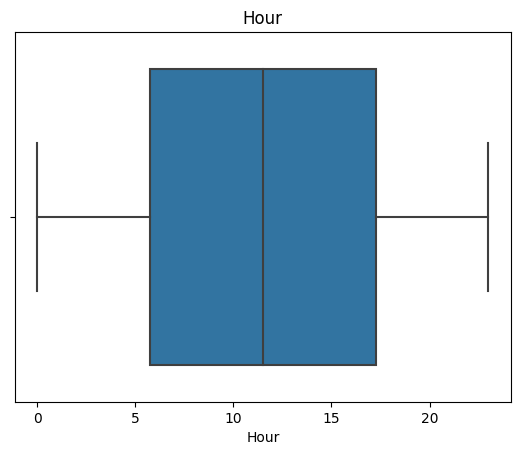

In [8]:
sns.boxplot(x=df['Solar electricity generation (kWh)'])
plt.title('Solar Electricity Generation')
plt.show()

sns.boxplot(x=df['Electricity usage (kWh)'])
plt.title('Electrical Usage')
plt.show()

sns.boxplot(x=df['Hour'])
plt.title('Hour')
plt.show()

SEG is left skewed, EU is not even showing up on the boxplot, Hours are normally distributed probably due to sunshine hours

In [9]:
z_scores_generation = np.abs(stats.zscore(df['Solar electricity generation (kWh)']))

threshold = 2

outliers_generation = np.where(z_scores_generation > threshold)

print("Outlier indices for Solar Electricity Generation:", outliers_generation)

Outlier indices for Solar Electricity Generation: (array([ 276,  420,  443,  587,  611,  660,  756,  757,  853,  924, 1019,
       1020, 1091, 1092, 1115, 1137, 1138, 1139, 1140, 1164, 1259, 1260,
       1261, 1306, 1307, 1308, 1330, 1331, 1332, 1333, 1542, 1590, 1738,
       1739, 1740, 1741, 1786, 1787, 1788, 1790, 1860, 1862, 1881, 1884,
       1906, 1907, 1908, 1909, 1910, 1930, 1932, 1955, 1956, 1957, 2025,
       2026, 2028, 2029, 2030, 2097, 2099, 2101, 2243, 2244, 2246, 2265,
       2266, 2267, 2268, 2269, 2270, 2291, 2481, 2482, 2486, 2528, 2529,
       2553, 2557, 2558, 2569, 2577, 2578, 2579, 2580, 2581, 2582, 2601,
       2602, 2603, 2604, 2605, 2606, 2625, 2626, 2627, 2628, 2629, 2630,
       2649, 2650, 2651, 2652, 2653, 2654, 2673, 2674, 2675, 2676, 2677,
       2678, 2696, 2697, 2699, 2701, 2702, 2745, 2746, 2750, 2768, 2773,
       2774, 2888, 2889, 2890, 2891, 2892, 2893, 2894, 2937, 2938, 2939,
       2940, 2941, 2961, 2962, 2963, 2964, 2965, 2966, 2984, 2985, 2986,


In [10]:
outlier_value = df.loc[276, 'Solar electricity generation (kWh)']
print('Outlier value:', outlier_value)

Outlier value: 5.214


In [11]:
print(df.loc[274:278])

     Hour      Date/hour start  Solar electricity generation (kWh)  \
274    10  2020-01-12 10:00:00                               0.951   
275    11  2020-01-12 11:00:00                               3.315   
276    12  2020-01-12 12:00:00                               5.214   
277    13  2020-01-12 13:00:00                               4.848   
278    14  2020-01-12 14:00:00                               0.777   

     Electricity usage (kWh)  
274                    0.444  
275                    0.387  
276                46000.000  
277                    0.573  
278                    0.459  


In [12]:
median_usage = df['Solar electricity generation (kWh)'].median()
df.loc[276, 'Solar electricity generation (kWh)'] = median_usage

In [13]:
print(df.loc[274:278])

     Hour      Date/hour start  Solar electricity generation (kWh)  \
274    10  2020-01-12 10:00:00                               0.951   
275    11  2020-01-12 11:00:00                               3.315   
276    12  2020-01-12 12:00:00                               0.024   
277    13  2020-01-12 13:00:00                               4.848   
278    14  2020-01-12 14:00:00                               0.777   

     Electricity usage (kWh)  
274                    0.444  
275                    0.387  
276                46000.000  
277                    0.573  
278                    0.459  


In [14]:
if df['Electricity usage (kWh)'].isnull().any():
    print("Missing values found!")

count     8760.000000
mean         7.312704
std        491.479806
min        -12.624000
25%          0.300000
50%          0.621000
75%          1.686000
max      46000.000000
Name: Electricity usage (kWh), dtype: float64


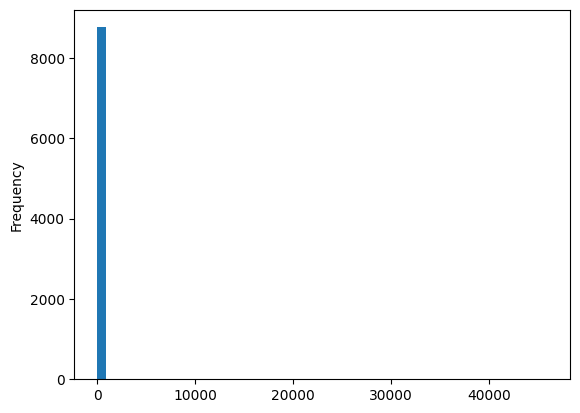

In [15]:
print(df['Electricity usage (kWh)'].describe())
df['Electricity usage (kWh)'].plot(kind='hist', bins=50)
plt.show()

In [16]:
negative_values = df[df['Electricity usage (kWh)'] < 0]
print("Number of negative values:", negative_values.shape[0])
print(negative_values.head())

Number of negative values: 5
      Hour      Date/hour start  Solar electricity generation (kWh)  \
17      17  2020-01-01 17:00:00                               0.006   
933     21  2020-02-08 21:00:00                               0.006   
935     23  2020-02-08 23:00:00                               0.000   
3593    17  2020-05-30 17:00:00                               1.185   
6464     8  2020-09-27 08:00:00                               0.717   

      Electricity usage (kWh)  
17                   -12.6240  
933                   -2.1330  
935                   -0.2175  
3593                  -2.5140  
6464                  -1.9770  


In [17]:
mean_value = df['Electricity usage (kWh)'][df['Electricity usage (kWh)'] >= 0].mean()
df['Electricity usage (kWh)'] = df['Electricity usage (kWh)'].apply(lambda x: mean_value if x < 0 else x)

count     8760.000000
mean         7.319104
std        491.479722
min          0.000000
25%          0.300000
50%          0.621938
75%          1.689600
max      46000.000000
Name: Electricity usage (kWh), dtype: float64


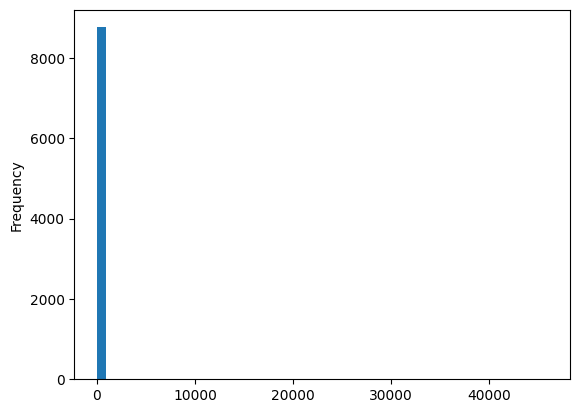

In [18]:
print(df['Electricity usage (kWh)'].describe())
df['Electricity usage (kWh)'].plot(kind='hist', bins=50)
plt.show()

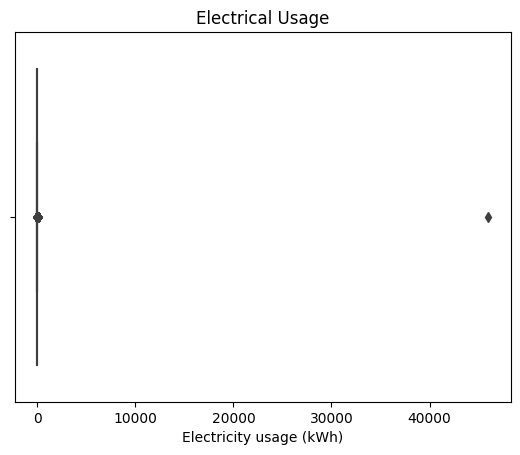

In [19]:
sns.boxplot(x=df['Electricity usage (kWh)'])
plt.title('Electrical Usage')
plt.show()

In [20]:
z_scores_usage = np.abs(stats.zscore(df['Electricity usage (kWh)']))

# Threshold for outliers
threshold = 2

outliers_generation = np.where(z_scores_generation > threshold)
outliers_usage = np.where(z_scores_usage > threshold)

# Printing the outlier indexes
print("Outlier indices for Electrical Usage:", outliers_usage)

Outlier indices for Electrical Usage: (array([276]),)


In [21]:
outlier_value = df.loc[276, 'Electricity usage (kWh)']
print('Outlier value:', outlier_value)

Outlier value: 46000.0


In [22]:
print(df.loc[274:278])

     Hour      Date/hour start  Solar electricity generation (kWh)  \
274    10  2020-01-12 10:00:00                               0.951   
275    11  2020-01-12 11:00:00                               3.315   
276    12  2020-01-12 12:00:00                               0.024   
277    13  2020-01-12 13:00:00                               4.848   
278    14  2020-01-12 14:00:00                               0.777   

     Electricity usage (kWh)  
274                    0.444  
275                    0.387  
276                46000.000  
277                    0.573  
278                    0.459  


In [23]:
median_usage = df['Electricity usage (kWh)'].median()
df.loc[276, 'Electricity usage (kWh)'] = median_usage

In [24]:
print(df.loc[274:278])

     Hour      Date/hour start  Solar electricity generation (kWh)  \
274    10  2020-01-12 10:00:00                               0.951   
275    11  2020-01-12 11:00:00                               3.315   
276    12  2020-01-12 12:00:00                               0.024   
277    13  2020-01-12 13:00:00                               4.848   
278    14  2020-01-12 14:00:00                               0.777   

     Electricity usage (kWh)  
274                 0.444000  
275                 0.387000  
276                 0.621938  
277                 0.573000  
278                 0.459000  


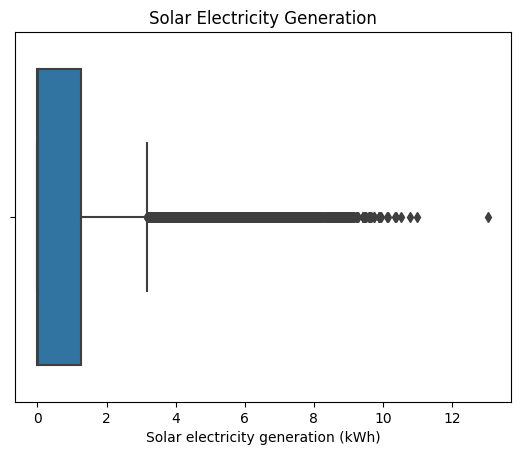

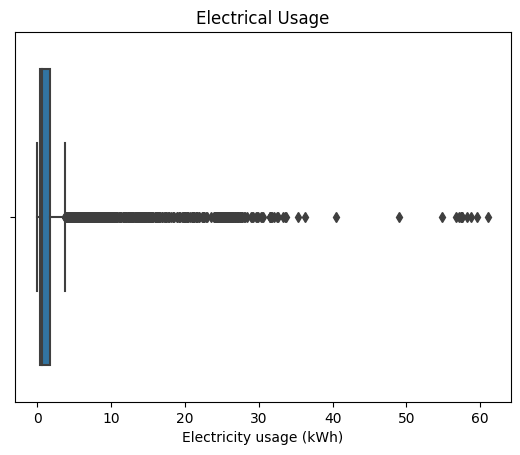

In [25]:
sns.boxplot(x=df['Solar electricity generation (kWh)'])
plt.title('Solar Electricity Generation')
plt.show()

sns.boxplot(x=df['Electricity usage (kWh)'])
plt.title('Electrical Usage')
plt.show()

presence of the actual plots means the data should be okay for now

###Hourly Calculations

Electricity Bought

In [26]:
df['electricity_bought'] = df['Electricity usage (kWh)'] - df['Solar electricity generation (kWh)']
df['electricity_bought'] = df['electricity_bought'].clip(lower=0)

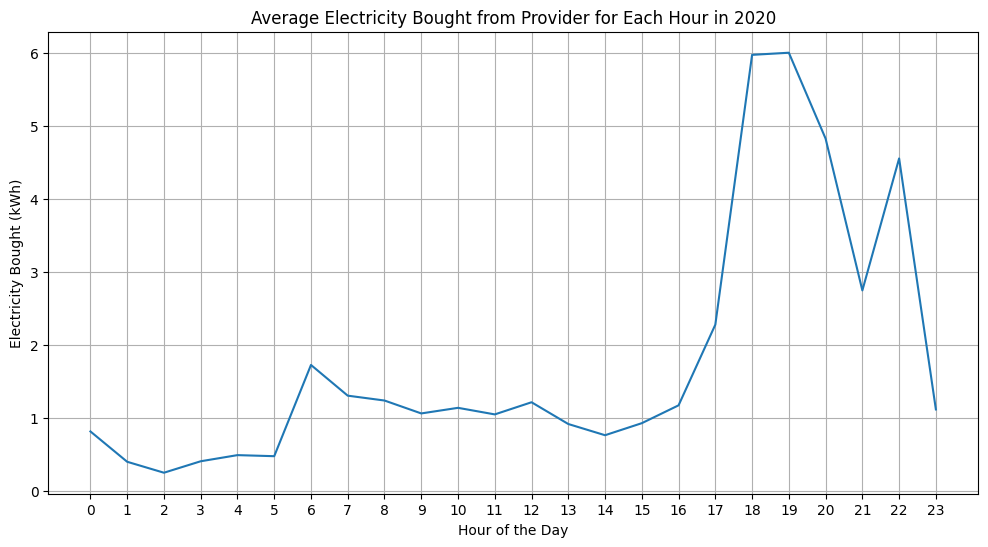

In [27]:
hourly_electricity_bought = df.groupby('Hour')['electricity_bought'].mean()

plt.figure(figsize=(12, 6))
plt.plot(hourly_electricity_bought)
plt.xticks(range(24))
plt.xlabel('Hour of the Day')
plt.ylabel('Electricity Bought (kWh)')
plt.title('Average Electricity Bought from Provider for Each Hour in 2020')
plt.grid(True)
plt.show()


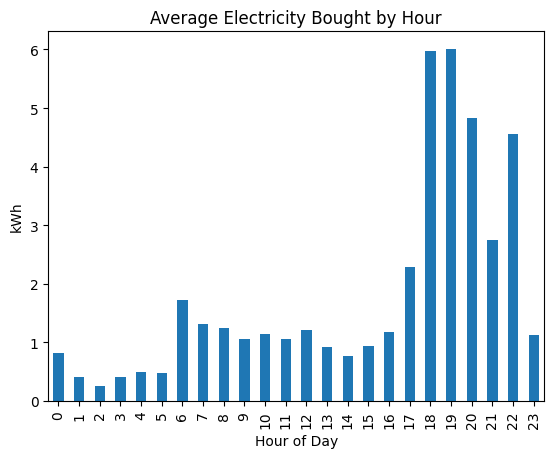

In [28]:
df.groupby('Hour')['electricity_bought'].mean().plot(kind='bar')
plt.title('Average Electricity Bought by Hour')
plt.ylabel('kWh')
plt.xlabel('Hour of Day')
plt.show()

Excess electricity generated

In [29]:
df['excess_generation'] = df['Solar electricity generation (kWh)'] - df['Electricity usage (kWh)']
df['excess_generation'] = df['excess_generation'].clip(lower=0)

<function matplotlib.pyplot.show(close=None, block=None)>

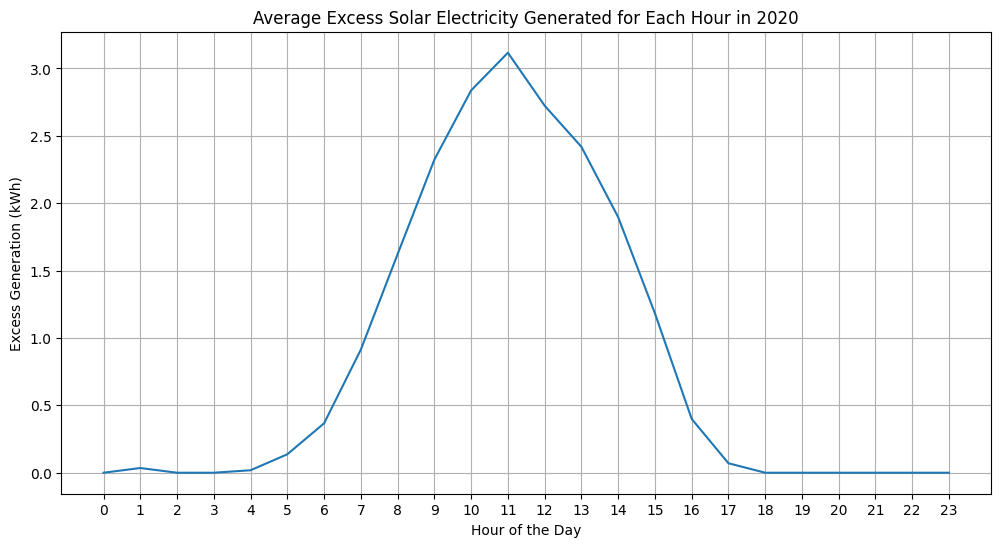

In [30]:
# Plotting the excess electricity generated
hourly_excess_generation = df.groupby('Hour')['excess_generation'].mean()

plt.figure(figsize=(12, 6))
plt.plot(hourly_excess_generation)
plt.xticks(range(24))  # Set x-ticks to be hours from 0 to 23
plt.xlabel('Hour of the Day')
plt.ylabel('Excess Generation (kWh)')
plt.title('Average Excess Solar Electricity Generated for Each Hour in 2020')
plt.grid(True)  # Adds gridlines to make the plot more readable
plt.show

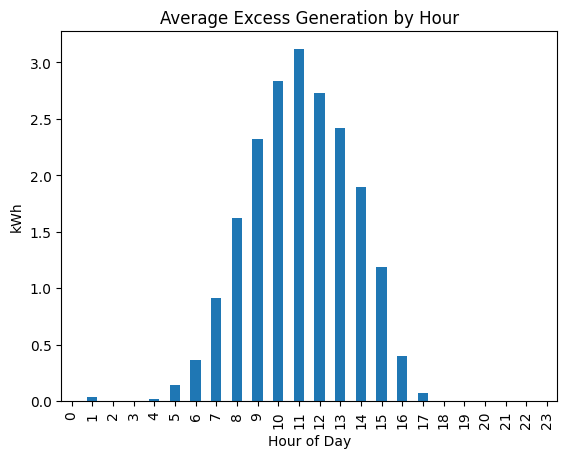

In [31]:
df.groupby('Hour')['excess_generation'].mean().plot(kind='bar')
plt.title('Average Excess Generation by Hour')
plt.ylabel('kWh')
plt.xlabel('Hour of Day')
plt.show()

###Battery Simulation

In [32]:
BATTERY_MAX_CAPACITY = 100
INITIAL_CHARGE_LEVEL = 0

charge_level = INITIAL_CHARGE_LEVEL
charge_levels = []

for index, row in df.iterrows():
    # Increase charge level by excess generation
    charge_level += row['excess_generation']
    # Decrease charge level by electricity bought
    charge_level -= row['electricity_bought']
    # Apply constraints
    charge_level = max(charge_level, 0)
    charge_level = min(charge_level, BATTERY_MAX_CAPACITY)
    # Store the result
    charge_levels.append(charge_level)

df['battery_charge_level'] = charge_levels

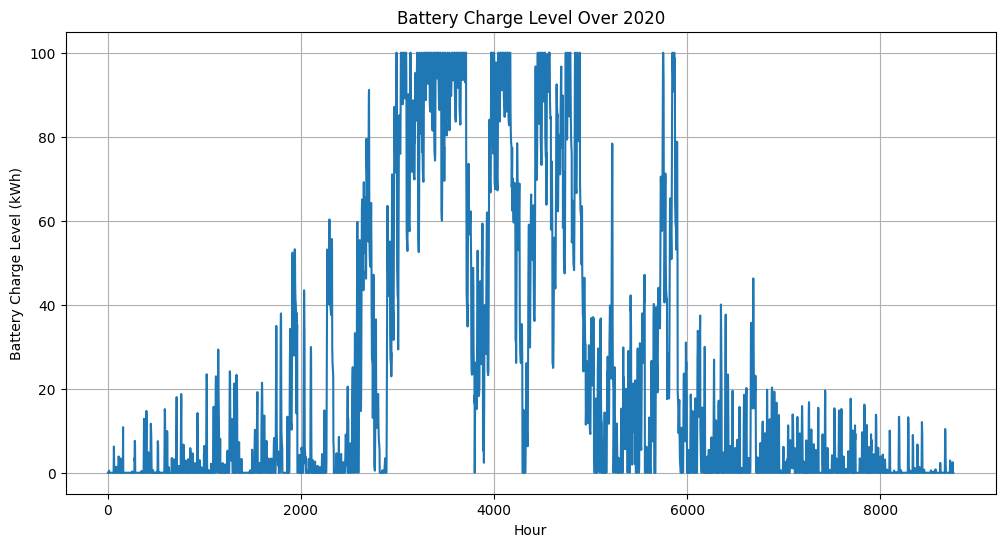

In [33]:
plt.figure(figsize=(12, 6))
plt.plot(df['battery_charge_level'])
plt.xlabel('Hour')
plt.ylabel('Battery Charge Level (kWh)')
plt.title('Battery Charge Level Over 2020')
plt.grid(True)
plt.show()

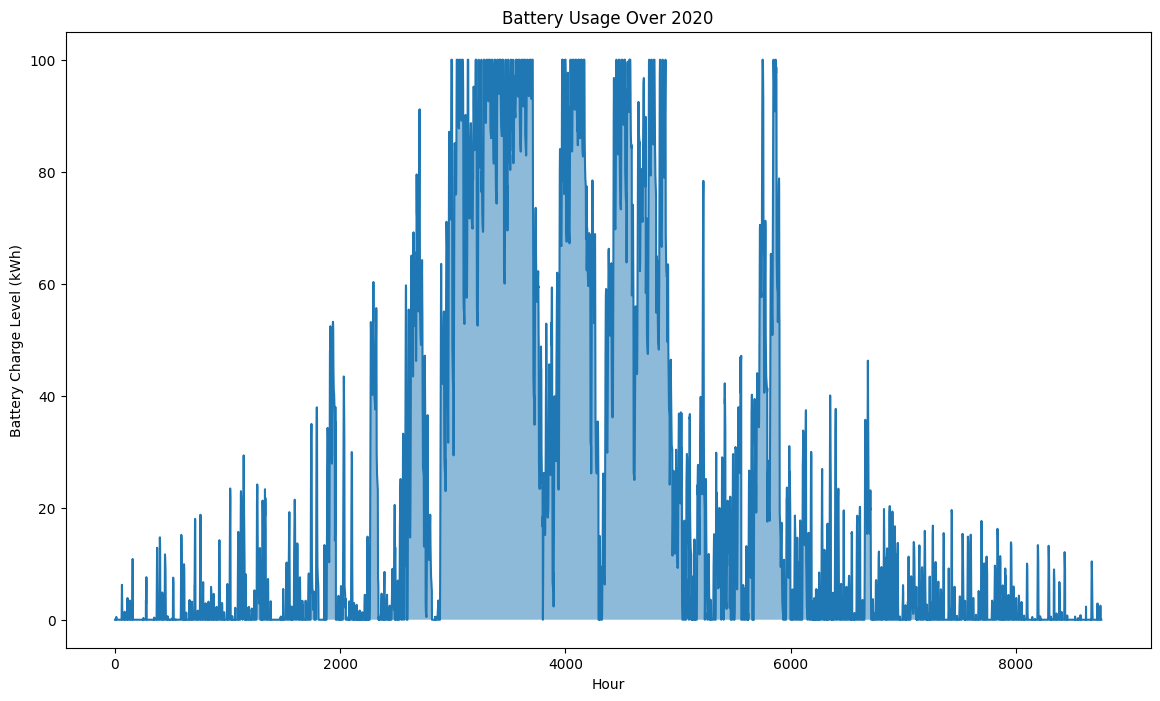

In [34]:
plt.figure(figsize=(14, 8))
plt.fill_between(df.index, 0, df['battery_charge_level'], alpha=0.5)
plt.plot(df['battery_charge_level'])
plt.xlabel('Hour')
plt.ylabel('Battery Charge Level (kWh)')
plt.title('Battery Usage Over 2020')
plt.show()

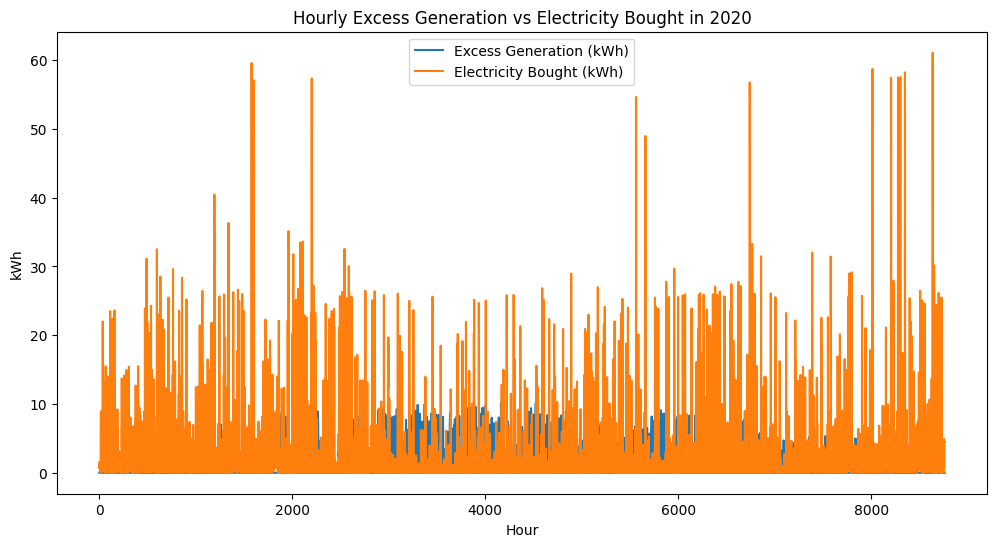

In [35]:
# Hourly Excess Generation vs Electricity Bought
plt.figure(figsize=(12, 6))
plt.plot(df['excess_generation'], label='Excess Generation (kWh)')
plt.plot(df['electricity_bought'], label='Electricity Bought (kWh)')
plt.xlabel('Hour')
plt.ylabel('kWh')
plt.title('Hourly Excess Generation vs Electricity Bought in 2020')
plt.legend()
plt.show()

###Calculations

Electricity bought with battery

In [36]:
df['Date/hour start'] = pd.to_datetime(df['Date/hour start'])

In [37]:
battery_capacity = 12.5
charge_level = 0
electricity_bought_with_battery = []

# Electricity price
price_per_kWh = 0.17
inflation_rate = 0.04

for index, row in df.iterrows():
    # Check the date for inflation
    if row['Date/hour start'].year > 2022:
        price_per_kWh += price_per_kWh * inflation_rate
        inflation_rate += 0.0025  # 0.25% increase year on year

    # First, use the current solar generation
    net = row['Solar electricity generation (kWh)'] - row['Electricity usage (kWh)']

    # If net is positive, we can charge the battery
    if net > 0:
        charge_level += net
        # If the charge exceeds the capacity, set it to the max
        if charge_level > battery_capacity:
            charge_level = battery_capacity
        electricity_bought_with_battery.append(0)

    # If net is negative, we need to use the battery or buy electricity
    else:
        # Use the battery first
        charge_level += net  # net is negative here
        if charge_level < 0:
            # If charge_level goes below zero, we need to buy electricity
            amount_to_buy = -charge_level
            charge_level = 0
            electricity_bought_with_battery.append(amount_to_buy)
        else:
            electricity_bought_with_battery.append(0)

df['electricity_bought_with_battery'] = electricity_bought_with_battery

Some visualizations

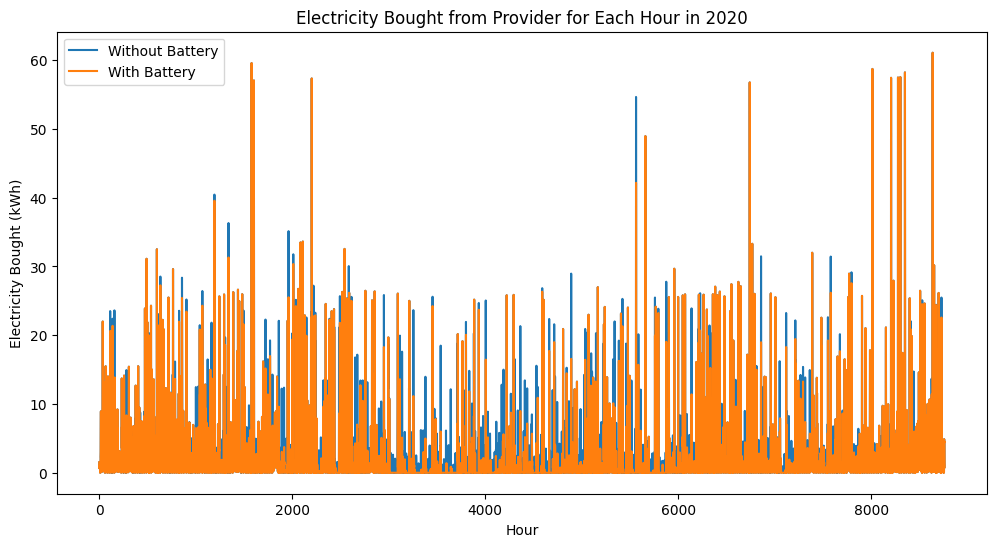

In [38]:
plt.figure(figsize=(12, 6))
plt.plot(df['electricity_bought'], label='Without Battery')
plt.plot(df['electricity_bought_with_battery'], label='With Battery')
plt.xlabel('Hour')
plt.ylabel('Electricity Bought (kWh)')
plt.title('Electricity Bought from Provider for Each Hour in 2020')
plt.legend()
plt.show()

Savings calculation

In [39]:
cost_without_battery = df['electricity_bought'].sum() * price_per_kWh
cost_with_battery = sum(electricity_bought_with_battery) * price_per_kWh

savings = cost_without_battery - cost_with_battery

# Assuming the battery cost is $7,000
battery_cost = 7000

net_savings = savings - battery_cost

In [40]:
print("Savings without the cost of the battery:", savings)
print("Net savings including the cost of the battery:", net_savings)

Savings without the cost of the battery: 594.9351741040036
Net savings including the cost of the battery: -6405.064825895996


###Tabulating the Data

Monthly Analysis

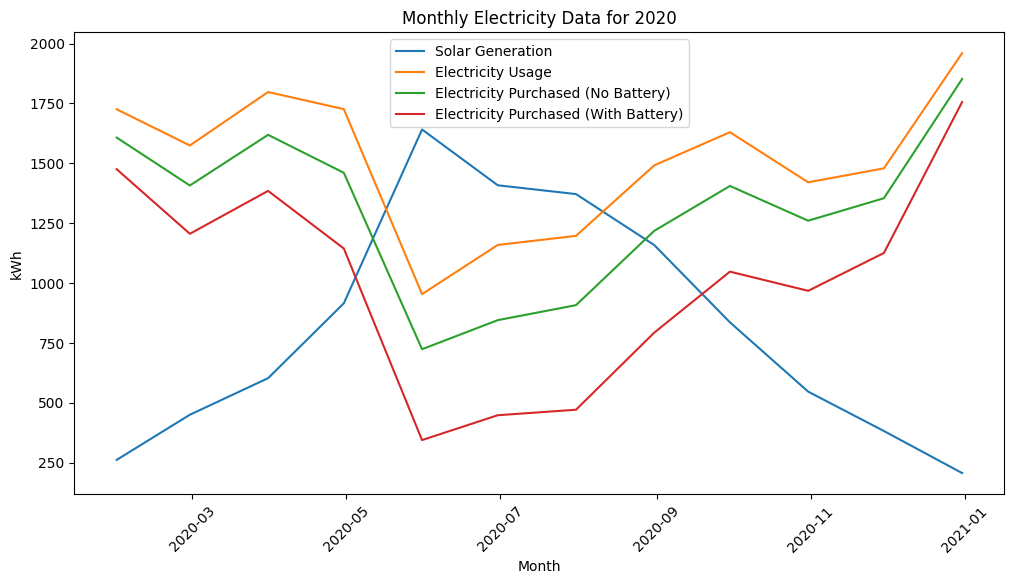

In [41]:
# Resample the DataFrame by month
monthly_data = df.resample('M', on='Date/hour start').sum()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(monthly_data['Solar electricity generation (kWh)'], label='Solar Generation')
plt.plot(monthly_data['Electricity usage (kWh)'], label='Electricity Usage')
plt.plot(monthly_data['electricity_bought'], label='Electricity Purchased (No Battery)')
plt.plot(monthly_data['electricity_bought_with_battery'], label='Electricity Purchased (With Battery)')
plt.xlabel('Month')
plt.ylabel('kWh')
plt.title('Monthly Electricity Data for 2020')
plt.xticks(rotation=45)
plt.legend()
plt.show()

###Projections based on some scenarios


Scenarios

In [42]:
initial_electricity_price = 0.17  # Initial price per kWh
battery_cost = 7000  # Cost of the battery
discount_rate = 0.05  # Assuming a discount rate of 5% (adjust as necessary)
years = 20  # Projecting for 20 years
annual_savings_without_inflation = 594.9351741040036  # The annual savings you calculated earlier

Functions for annual savings and npv for both scenarios

In [43]:
def calculate_annual_savings_scenario1():
    annual_savings = []
    electricity_price = initial_electricity_price
    for year in range(years):
        # Increase the electricity price by 4% per annum
        electricity_price *= 1.04
        savings = annual_savings_without_inflation * electricity_price
        annual_savings.append(savings)
    return annual_savings

def calculate_annual_savings_scenario2():
    annual_savings = []
    electricity_price = initial_electricity_price
    inflation_rate = 0.04  # Starting at 4%
    for year in range(years):
        # Increase the electricity price by the inflation rate, which increases by 0.25% each year
        electricity_price *= 1 + inflation_rate
        savings = annual_savings_without_inflation * electricity_price
        annual_savings.append(savings)
        inflation_rate += 0.0025  # Increase inflation rate by 0.25%
    return annual_savings

def calculate_npv(annual_savings):
    npv = 0
    for year in range(years):
        npv += annual_savings[year] / (1 + discount_rate) ** (year + 1)
    return npv - battery_cost  # Subtracting the cost of the battery

projection

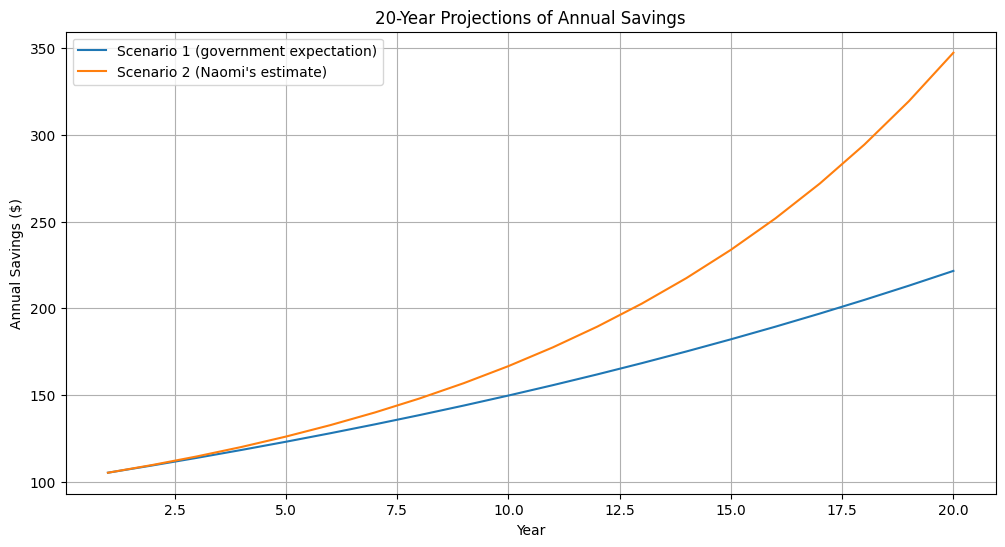

In [44]:
annual_savings_scenario1 = calculate_annual_savings_scenario1()
annual_savings_scenario2 = calculate_annual_savings_scenario2()

def plot_projections(annual_savings_scenario1, annual_savings_scenario2):
    plt.figure(figsize=(12, 6))
    plt.plot(range(1, years + 1), annual_savings_scenario1, label="Scenario 1 (government expectation)")
    plt.plot(range(1, years + 1), annual_savings_scenario2, label="Scenario 2 (Naomi's estimate)")
    plt.xlabel('Year')
    plt.ylabel('Annual Savings ($)')
    plt.title('20-Year Projections of Annual Savings')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_projections(annual_savings_scenario1, annual_savings_scenario2)

results

In [45]:
annual_savings_scenario1 = calculate_annual_savings_scenario1()
annual_savings_scenario2 = calculate_annual_savings_scenario2()

npv_scenario1 = calculate_npv(annual_savings_scenario1)
npv_scenario2 = calculate_npv(annual_savings_scenario2)

print("NPV for scenario 1 (government expectation):", npv_scenario1)
print("NPV for scenario 2 (Naomi's estimate):", npv_scenario2)

NPV for scenario 1 (government expectation): -5167.803859402129
NPV for scenario 2 (Naomi's estimate): -4848.869918751596


Here, Scenario 1 follows the government's expectation of a 4% increase in electricity prices per annum, while Scenario 2 follows Naomi's estimate where the inflation rate starts at 4% and increases by 0.25% each year.

###Calculate IRR

In [46]:
def calculate_irr(annual_savings):
    cash_flows = [-battery_cost] + annual_savings  # Initial investment as a negative value, followed by annual savings
    return npf.irr(cash_flows)

annual_savings_scenario1 = calculate_annual_savings_scenario1()
annual_savings_scenario2 = calculate_annual_savings_scenario2()

irr_scenario1 = calculate_irr(annual_savings_scenario1)
irr_scenario2 = calculate_irr(annual_savings_scenario2)

print("IRR for scenario 1 (government expectation):", irr_scenario1 * 100, "%")
print("IRR for scenario 2 (Naomi's estimate):", irr_scenario2 * 100, "%")


IRR for scenario 1 (government expectation): -6.1063152538290755 %
IRR for scenario 2 (Naomi's estimate): -4.444814783629647 %
